## Gradient Boosting

In this notebook, you will use [scikit-learn's regression trees](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and implement the gradient boosting algorithm for least squares regression. In particular, you will:

1. Implement gradient boosting with shrinkage and evaluate its performance on the boston housing data set.
2. Investigate the effect of number of iterations and tree depth.
3. Plot the additive structure of gradient boosting.

The exercise is mostly based on the lecture and the following book:

T. Hastie, R. Tibshirani, and J. Friedman: [*The Elements fo Statistical Learning*](http://statweb.stanford.edu/~tibs/ElemStatLearn/), 2001

As usual, some setup first:

In [1]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.dummy
import sklearn.tree
import sklearn.base
import sklearn.metrics
import sklearn.ensemble

import numpy as np

% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load the boston housing dataset
def create_dataset():
    
    boston = sklearn.datasets.load_boston()
    X = boston.data
    y = boston.target
    # y += np.random.randn(y.shape[0]) * 3
    X_train, X_test, y_train, y_test = \
        sklearn.cross_validation.train_test_split(X, y, random_state=1)
    return X_train, y_train, X_test, y_test

In [3]:
class GradienBoosting(object):
    
    def __init__(self, iterations):
        # Some global variables
        self.iterations = iterations
        self.classifiers = list()
        self.weak_learner = sklearn.tree.DecisionTreeRegressor(
            max_depth=1)

    def fit(self, X, y):
        # YOUR TURN
        # 1. Initialize f_0
        # hint: Scikit-learn offers dummy predictors 
        # (e.g. DummyRegressor), which return constant 
        # predictions according to a simple, user-defined rule
        
        # 2. For m = 1 to m
        
        # 2.a) compute pseudo residuals
        # 2.b) fit regression tree to the residuals
        # 2.c) update terminal region: not necessary for 
        #      squared loss
        # 2.d) update f_of_x
        pass
    
    def predict(self, X):
        # YOUR TURN
        pred = np.zeros(X.shape[0])
        return pred
    
    def staged_predict(self, X):
        # returns predictions for X for all iterations 
        # this is for convenience to simplify computing
        # train/test error for all models

        staged_predictions = []
        # YOUR TURN
            
        return staged_predictions

### Test your implementation
Now, you have a working implementation of the gradient boosting algorithm. 

To test your algorithm for correctness you can compare to [sklearn's gradient boosting implementation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) which should yield the same output as your implementation:

In [4]:
# Use this cell to test whether your implementation is correct

gbm = GradienBoosting(iterations=400)
sk_gbm = sklearn.ensemble.GradientBoostingRegressor(
    n_estimators=400, learning_rate=1.0, max_depth=1)

# Get data
X_train, y_train, X_test, y_test = create_dataset()

# Fit model
gbm.fit(X_train, y_train)
sk_gbm.fit(X_train, y_train)

# Predict
pred = gbm.predict(X_test)
pred_sk = sk_gbm.predict(X_test)

print("Difference: %d" % np.sum([pred - pred_sk]))

AttributeError: 'module' object has no attribute 'cross_validation'

###  Add shrinkage

The scikit-learn implementation offers a parameter 'learning_rate' which implements skrinkage, such that the contribution of each model is shrinked. This means the adaption to the target function is slowed down and thus prevents gradient boosting from overfitting. Changing line (d) in the Pseudocode (see Algorithm 10.3 *Gradient Tree Boosting Algorithm*) from 

$f_m(x) = f_{m-1}(x) + \sum_{j=1}^{J_m} \gamma_{jm} {\bf I} (x \in R_{jm})$

to

$f_m(x) = f_{m-1}(x) + \nu \sum_{j=1}^{J_m} \gamma_{jm} {\bf I} (x \in R_{jm})$

will do this. Add a learning rate to your implementation of Gradient Boosting. Therefore you should add an additional parameter 'learning_rate', which you will need in both methods, *predict* and *fit*.

### Playground

Next, you can now play around with AdaBoost's hyperparameters. Here are some suggestions to try:

* Investigate the number of iterations that are needed to start overfitting.
* Add some noise on the targets and try again
* Investigate the effect of the tree depth
* Investigate effect of shrinkage

But first you should implement a plotting function to show train/test error over time:

In [7]:
def plot_train_test_error(model, X_train, y_train, X_test, y_test):
    ''' Shows a plot with train/test error over iterations

    model (GBM): trained GBM algorithm
    X_train (array): [#samples, #features]
    y_train (array): [#samples, ]
    X_test (array): [#samples, #features]
    y_test (array): [#samples, ]
    '''
    # Loop over all predictions and compute the mean squared error

    y_pred_train = model.staged_predict(X_train)
    training_errors = [sklearn.metrics.mean_squared_error(y_train, y_pred) 
                       for y_pred in y_pred_train]
    
    y_pred_test = model.staged_predict(X_test)
    test_errors = [sklearn.metrics.mean_squared_error(y_test, y_pred) 
                   for y_pred in y_pred_test]
    
    # Plot results
    x_values = np.arange(1, len(training_errors) + 1)

    plt.plot(x_values, training_errors, label="training")
    plt.plot(x_values, test_errors, label="test")
    plt.xlabel("iterations")
    plt.ylabel("MSE")
    plt.legend(loc="best")

    plt.show()

In [8]:
# YOUR TURN

### Plot individual models
Finally, it's time to investigate the additive nature of gradient boosting. For this, we plot the prediction of the gradient boosting model for a sine curve after different amounts of iterations

(-10, 10)

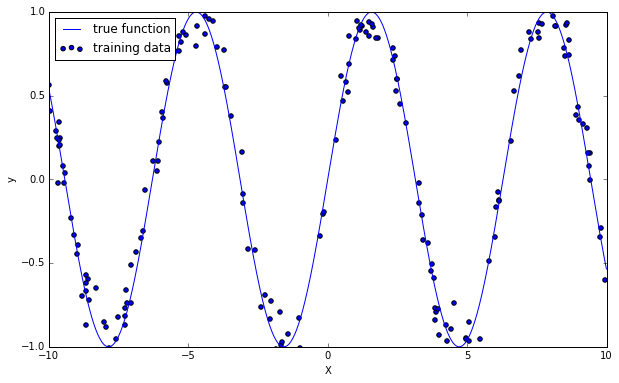

In [9]:
# Here's some training data:
np.random.seed(1)
num_data_points = 200
lower_bound = -10
upper_bound = 10
X = np.random.uniform(lower_bound, upper_bound, num_data_points)
X = X.reshape((-1, 1))
y = (np.sin(X) + np.random.randn(num_data_points).reshape((-1, 1)) * 0.1)
y = y.ravel()

true_function_X = np.arange(lower_bound, upper_bound, 0.01)
true_function_X = true_function_X.reshape((-1, 1))

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', 
           edgecolor='k')
plt.scatter(X.ravel(), y, label="training data")
plt.plot(true_function_X, np.sin(true_function_X), 
         label='true function')
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc="best")
plt.ylim([-1, 1])
plt.xlim([lower_bound, upper_bound])

# YOUR TURN
# Plot a line for each model